## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [5]:
df["converted"].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(group == "treatment")&(landing_page != "new_page")').shape[0] + df.query('(group != "treatment")&(landing_page == "new_page")').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2= df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id.duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop(df2[df2.user_id.duplicated()==True].index)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [16]:
df2.user_id.nunique()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
p_old = df2.query('group == "control"').converted.mean()
p_old 

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
p_new = df2.query('group == "treatment"').converted.mean()
p_new 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
(df2['landing_page']=='new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [21]:
obs_differ = p_new-p_old
obs_differ

-0.0015782389853555567

p_old is the probability of an individual converted in the "control" group and p_new is the probability of an individual converted in the "treatment" group. From the differences between them, there is not a sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis $$H_0：P_{new}-P_{old}\leq0$$

Alternative hypothesis $$H_1：P_{new}-P_{old}>0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$? the number of individuals in the treatment group?

In [24]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$? the number of individuals in the control group?

In [25]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice(np.arange(2),n_new,p=[(1-p_new),p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice(np.arange(2),n_old,p=[(1-p_old),p_old])
old_page_converted

array([0, 0, 1, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted.mean()-old_page_converted.mean()

-0.0006562209498482408

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice(np.arange(2),n_new,p=[(1-p_new),p_new])
    old_page_converted = np.random.choice(np.arange(2),n_old,p=[(1-p_old),p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

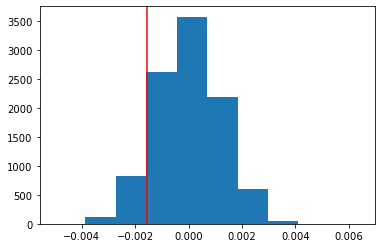

In [30]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(x=obs_differ,color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
(p_diffs > obs_differ).mean()

0.9033

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j I calculated the p-value. The p-value is much larger than the error rate of type I error 𝛼 = 0.05 , it is not statistically significant. Therefore the null hypothesis cannot be rejected, which means that the possibility that the convert rate of the old page is better than the convert rate of the new page cannot be rejected.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted == 1').shape[0]
convert_new = df2.query('group=="treatment" & converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score,p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
z_score,p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

According to the z-score = -1.31 obtained above, its absolute value is compared with the critical value of z-score when 𝛼 = 0.05, and because of 1.31 is less than 1.645, 𝐻0 cannot be rejected.
p-value obtained according to the above is 0.905, which is much larger than 0.05 and is close to the value calculated in part j. Therefore 𝐻0 cannot be rejected either, i.e. the possibility that the conversion rate of the old page is better than the conversion rate of the new page cannot be excluded.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistische Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2[["control","treatment"]]= pd.get_dummies(df2.group)

In [35]:
df2["intercept"]=1
df2 = df2.drop("control",axis=1)
df2.rename(columns= {"treatment":"ab_page"},inplace=True)

In [36]:
df2.head(6)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
Log_model = sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
results = Log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:20:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [39]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.19. The null and alternative hypotheses for the ab_page correlation coefficient are :
$$H_0:\beta_1 = 0$$
$$H_1:\beta_1\not=0$$
When p_value=0.19, it is much greater than 𝛼=0.025 , so we cannot reject the possibility that 𝛽1=0, which means that the possibility that the A/B test has no correlation with page conversion cannot be rejected.

The null and alternative hypotheses in the Part II are :
$$H_0：P_{new}-P_{old}\leq0$$
$$H_1: P_{new}-P_{old}>0$$
p-value according to the Part II is 0.905, which is much larger than 0.05. Therefore 𝐻0 cannot be rejected, i.e. the possibility that the conversion rate of the old page is better than the conversion rate of the new page cannot be excluded.

The reason for the difference between the two p-value values lies in the different assumptions made by the two.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In reality, there are more factors that may affect the page convert rate, and theoretically, adding more considerations to the regression model will lead to an increase in the correlation coefficient $𝑅^2$. Therefore it is a good idea to adding additional terms into the regression model.

The main disadvantage of adding additional terms to the regression model is that the addition of additional terms, especially higher order terms, can be very complicated when interpreting the model and statistical summaries.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
### Create the necessary dummy variables
df_new = pd.get_dummies(df_new, columns=['country'])
df_new=df_new.drop('country_US',axis=1)
df_new.head(6)

,timestamp,group,landing_page,converted,ab_page,intercept,country_CA,country_UK
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1
909908,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1


In [42]:
#Logistic regression for the newly added country columns
Log_model2 = sm.Logit(df_new["converted"],df_new[['intercept','country_CA','country_UK']])
results2 = Log_model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:               1.521e-05
Time:                        23:20:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
country_CA    -0.0408      0.027     -1.518      0.129      -0.093       0.012
country_UK     0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [43]:
np.exp(results2.params)

intercept     0.135779
country_CA    0.960018
country_UK    1.009966
dtype: float64

In [44]:
1/np.exp(results2.params)

intercept     7.364925
country_CA    1.041647
country_UK    0.990133
dtype: float64

The p-values of 0.129 and 0.456 for the country_CA and country_UK columns are larger than 𝛼=0.025. so neither can reject the null hypothesis $$H_0:\beta_1 = 0$$ . 

It means that the possibility that the country column and the convert rate are not correlated cannot be rejected.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
### Fit Your Linear Model And Obtain the Results
df_new[['new_page','old_page']]= pd.get_dummies(df_new['ab_page'])
df_new = df_new.drop('old_page',axis=1)
df_new['new_UK'] = df_new['new_page'] * df_new['country_UK']
df_new['new_CA'] = df_new['new_page'] * df_new['country_CA']
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country_CA,country_UK,new_page,new_UK,new_CA
user_id,,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,1,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,1,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [46]:
logit_mod3 = sm.Logit(df_new['converted'],df_new[['intercept','new_page','country_UK','country_CA','new_UK','new_CA']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        23:20:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0070      0.010   -207.045      0.000      -2.026      -1.988
new_page       0.0206      0.014      1.505      0.132      -0.006       0.047
country_UK     0.0257      0.019      1.363      0.173      -0.011       0.063
country_CA    -0.0644      0.038     -1.679      0.093      -0.140       0.011
new_UK        -0.0314      0.027     -1.181      0.238      -0.084       0.021
new_CA         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [47]:
np.exp(results3.params)

intercept     0.134386
new_page      1.020776
country_UK    1.025986
country_CA    0.937618
new_UK        0.969090
new_CA        1.048001
dtype: float64

In [48]:
1/np.exp(results3.params)

intercept     7.441269
new_page      0.979646
country_UK    0.974672
country_CA    1.066532
new_UK        1.031896
new_CA        0.954198
dtype: float64

The p-values of the new_page, country_CA, country_UK, new_CA, new_UK columns are 0.132, 0.093, 0.173, 0.383 and 0.238, which are larger than 𝛼 = 0.025, so neither can reject the null hypothesis. $$H_0:\beta_1 = 0$$ . 

<a id='conclusions'></a>
## Conclusions
This project is about data analysis and statistics of A/B testing for e-commerce websites, mainly analyzing the converted rate of old and new pages, and exploring between potential correlation factors. The steps of the analysis are as follows.
#### 1. Data organization
Import the dataset, clean up the data, check the single-user converted rate, and assume that an individual was in the control group and an individual was in the treatment group, what is the probability they converted in each group.
#### 2. Data analysis
Make the following assumptions.

Null hypothesis $$H_0：P_{new}-P_{old}\leq0$$
Alternative hypothesis $$H_1：P_{new}-P_{old}>0$$
Based on this assumption, i simulated the sample 10,000 times, visualized the simulation results, and based this part the p-value was calculated.The p-value is 0.9033, which much larger than the error rate of type I error 𝛼 = 0.05 , it is not statistically significant. Therefore the null hypothesis cannot be rejected, which means that the possibility that the convert rate of the old page is better than the convert rate of the new page cannot be rejected. Meanwhile, the statistical built-in model was applied to calculate z-score and p-value, and p-value=0.9051, which was close to the simulation results.
#### 3. Logistic regression
##### 3.1 
First, the correlation between page converted and old and new page was explored. The p-value associated with ab_page is 0.19. The null and alternative hypotheses for the ab_page correlation coefficient are :
$$H_0:\beta_1 = 0$$
$$H_1:\beta_1\not=0$$
When p_value=0.19, it is much greater than 𝛼=0.025 , so we cannot reject the possibility that 𝛽1=0, which means that the possibility that the A/B test has no correlation with page conversion cannot be rejected.
##### 3.2
Then, the correlation between page conversion and country classification was tested.The p-values of 0.129 and 0.456 for the country_CA and country_UK columns are larger than 𝛼 = 0.025. So neither can reject the null hypothesis $$H_0:\beta_1 = 0$$
It means that the possibility that the country column are not correlated with the convert rate cannot be rejected.
##### 3.3
Then, the correlations between the page conversion and the interaction terms between page and country, as well as all the lower-order terms associated with the interaction terms, were explored. And the p-values of the new_page, country_CA, country_UK, new_CA, new_UK columns are 0.132, 0.093, 0.173, 0.383 and 0.238, which are larger than 𝛼 = 0.025, so neither can reject the null hypothesis. Which means that the possibility that the new interaction term and all associated lower-order terms are not relevant with the page converted rate cannot be rejected.
#### 4. Conclusion
Through all the above analysis, we are unable to determine the following information:

a. The new page is better than the old page in terms of user conversions.

b. There is a statistically significant correlation between the convert rate and the old and new pages.

c. There is a statistically significant correlation between the convert rate and country factors.

d. There is a statistically significant correlation between the convert rate and the country-new page interaction term.
#### 5. Recommendations
Since the new pages did not make a significant difference in user conversions, there was no strong need to adopt the new pages. Also, there is no significant difference in page conversion between users from different countries (only for the three countries in the dataset, US, UK, CA), so there is no need to emphasize the particular importance of users from a particular country in these three countries.
In reality, there are many other factors that influence page conversion, such as user age, language, length of time spent on the page, etc., which may affect the acceptance of new pages and user conversion. It is recommended that relevant data can be collected and further data analysis can be performed.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1